In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("HCM_weather_42023_42024.csv")
dftest = pd.read_csv('HCM_weather_42023_42024_test.csv')

In [ ]:
df.columns

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations', 'month', 'hour'],
      dtype='object')

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)
# Trích xuất các thành phần từ cột datetime
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

In [10]:
features =['feelslike', 'dew', 'humidity', 'windgust', 'winddir', 'solarradiation', 'visibility', 'cloudcover', 'month', 'hour']
labels = df['temp']
data = df[features]

In [11]:
data

,feelslike,dew,humidity,windgust,winddir,solarradiation,visibility,cloudcover,month,hour
0,30.6,25.0,88.84,23.0,150.0,0,10.0,50.0,4,0
1,30.3,24.9,88.88,24.5,140.0,0,10.9,52.8,4,1
2,30.6,25.0,88.84,24.1,150.0,0,10.0,50.0,4,2
3,30.6,25.0,88.84,24.8,150.0,0,10.0,50.0,4,3
4,30.2,24.9,88.98,23.4,149.0,0,10.9,53.7,4,4
...,...,...,...,...,...,...,...,...,...,...
9499,39.2,25.1,67.39,29.2,169.0,0,10.9,30.1,4,19
9500,42.3,27.0,74.95,27.7,170.0,0,10.0,100.0,4,20
9501,40.6,27.0,79.33,24.8,160.0,0,10.0,100.0,4,21
9502,42.0,27.9,83.97,24.8,185.0,0,10.9,80.0,4,22


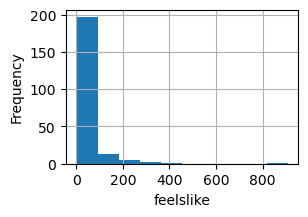

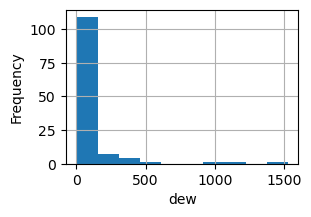

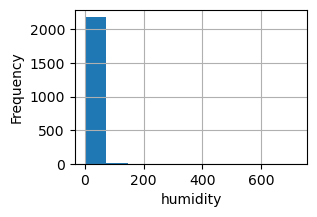

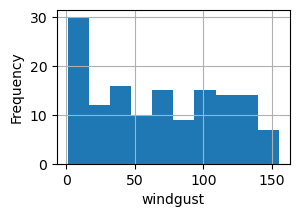

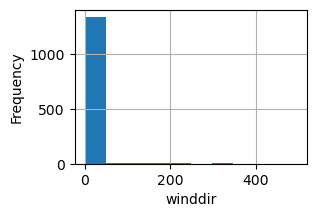

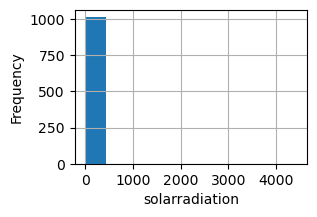

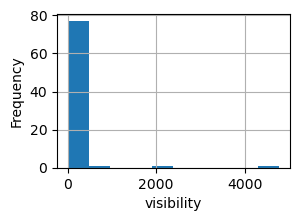

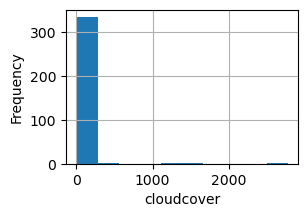

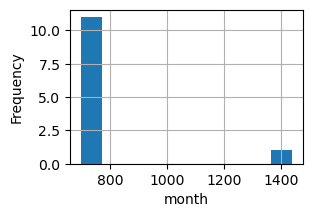

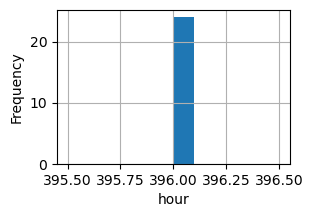

In [16]:

for column in data.columns:
    plt.figure(figsize=(3, 2))
    data[column].value_counts().plot(kind = 'hist', xlabel=column, grid=1)

In [32]:
X_train = data.values
y_train = labels.values


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scalers = {}
for i, feature in enumerate(features):
    scalers[feature] = StandardScaler()
    X_train[:, i] = scalers[feature].fit_transform(X_train[:,i].reshape(-1, 1)).reshape(-1)

In [30]:
X_train.shape

(9504, 10)

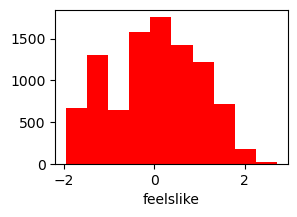

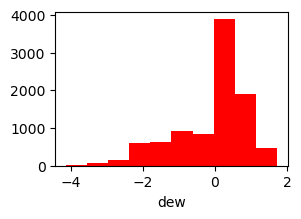

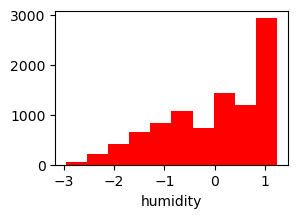

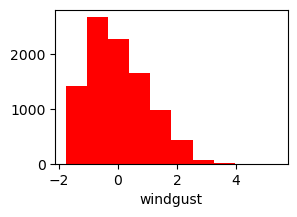

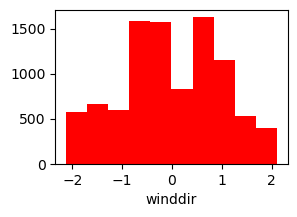

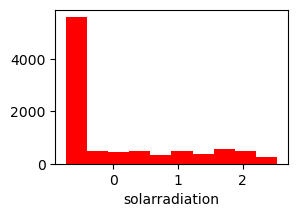

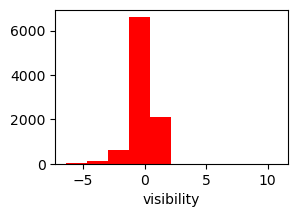

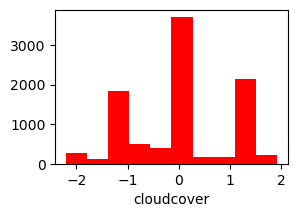

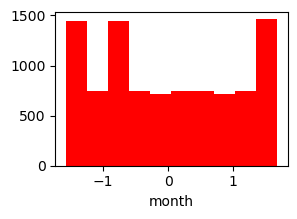

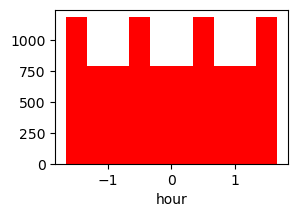

In [28]:
for i, column in enumerate(features):
    plt.figure(figsize=(3, 2))
    plt.hist(X_train[:,i], color='red')
    plt.xlabel(column)

print(1)